An Introduction to Statistical Learning with Python -- Chapter 2
2.3.2 Basic Command

In [2]:
print(3,"Hello Python",4.778)
print(3+4)
print("Hello"+" Python")
a=[1,2,3]
b=[4,5,6]
a+b

3 Hello Python 4.778
7
Hello Python


[1, 2, 3, 4, 5, 6]

2.3.3 Introduction to Numerical Python

In [17]:
import numpy as np
np.random.seed(123)  #--> make sure your result is replicatable
x=np.array(a)
y=np.array(b)
print(x+y)  #different from list
#several attribute
x=np.array(([1,1],[2,2]))
print(x)
print(x.ndim)
print(x.shape)
print(x.dtype)  
x=x.reshape(1,4)
print(x)
x.sum()
#The index of an array starts from 0
print(x.T)
#some mathematical calculation
print(np.sqrt(x))
print(x**x)
#generate normal distribution
r=np.random.normal(loc=1,scale=1,size=4)  #loc-->average scale-->variance size-->number
print(r)
y=x+r
print(np.corrcoef(x,y))  #computes the correlation matrix between x and y
print(x.mean(),x.var(),x.std())

[5 7 9]
[[1 1]
 [2 2]]
2
(2, 2)
int32
[[1 1 2 2]]
[[1]
 [1]
 [2]
 [2]]
[[1.         1.         1.41421356 1.41421356]]
[[1 1 4 4]]
[ 0.15103873  1.93466864 -0.21433739  1.67392149]
[[1.         0.35030951]
 [0.35030951 1.        ]]
1.5 0.25 0.5


2.3.4Graphics

NameError: name 'np' is not defined

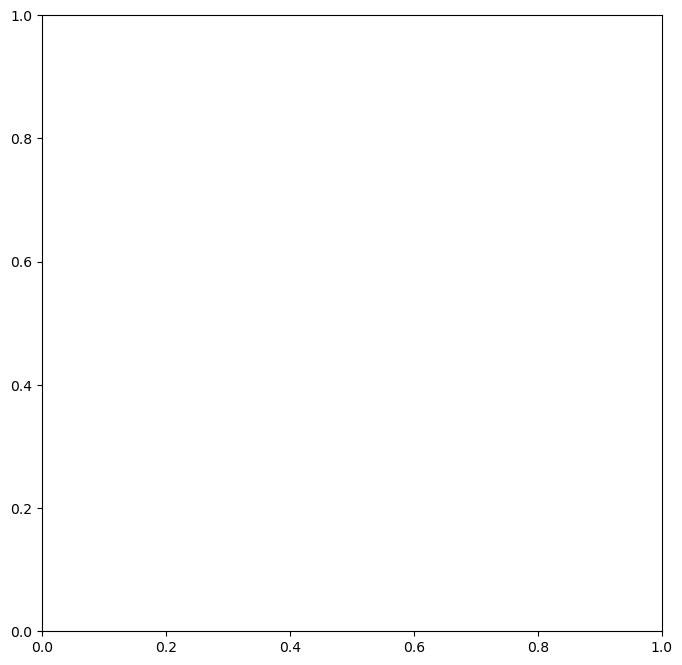

In [2]:
from matplotlib.pyplot import subplots
fig,ax=subplots(figsize=(8,8))
x=np.random.normal(loc=50,scale=30,size=100)
y=3*x+1+np.random.normal(loc=10,scale=20,size=100)
#ax.plot(x,y,"o")  #scatter plot
ax.scatter(x,y,marker="o") #alternative
ax.set_xlabel("This is xlabel")
ax.set_ylabel("This is ylabel")
ax.set_title("Wow!")
fig.set_size_inches(12,3)

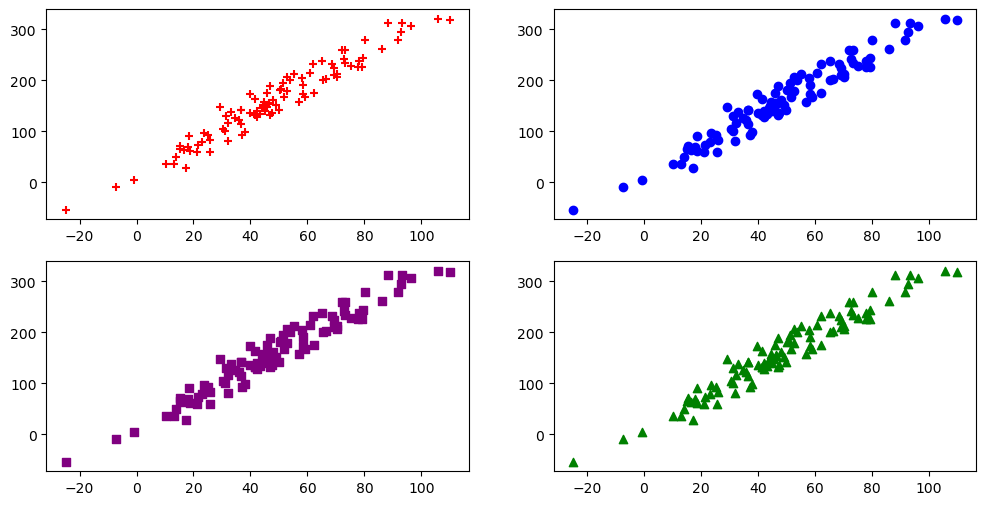

In [38]:
#How to create severl plots
fig,ax=subplots(2,2,figsize=(12,6))  #figsize can't be omitted
ax[0,0].scatter(x,y,marker='+',color="red")  #marker can't be omitted
ax[0,1].scatter(x,y,marker='o',color="blue")
ax[1,1].scatter(x,y,marker='^',color="green")
ax[1,0].scatter(x,y,marker='s',color="purple")
fig.savefig("Scatter Plot.png")

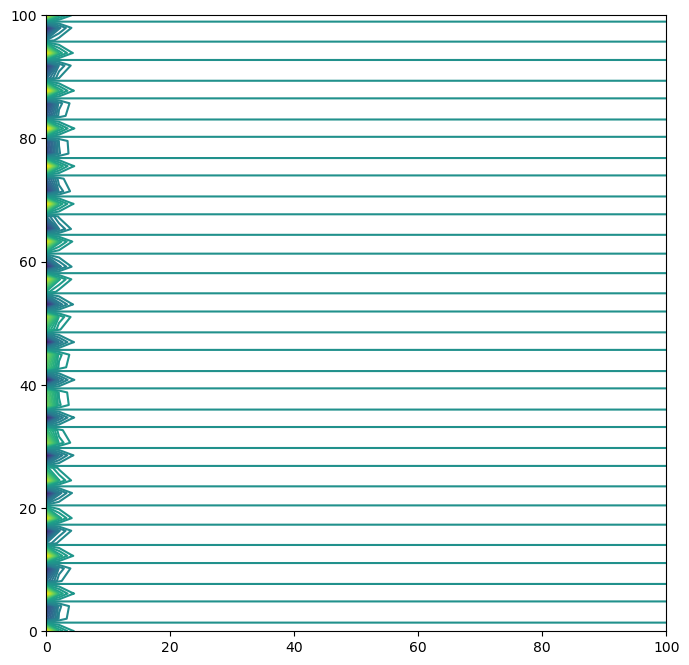

In [43]:
#ax.contour  -->three demensional plot
x=np.linspace(0,100)
y=np.linspace(0,100)
z= np.multiply.outer(np.cos(y), 1 / (1 + x**2))
fig, ax = subplots(figsize=(8, 8))
ax.contour(x, y, z, levels=45)

2.3.5 Sequences and Slice Notation

In [45]:
seq1=np.linspace(0,10,11)
seq2=np.arange(0,10)
print(seq1,seq2)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.] [0 1 2 3 4 5 6 7 8 9]


2.3.6 Indexing Data

In [55]:
A=np.arange(16).reshape(4,4)
print(A)
print(A[1,2]) #second row and third column
print(A[[1,3]]) #second and fourth row
print(A[:,[0,2]]) #first and third column
print(A[[1,3]][:,[0,2]])  #extract several rows and columns
#Alternative
idx=np.ix_([1,3],[0,2])
print(A[idx])


[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
6
[[ 4  5  6  7]
 [12 13 14 15]]
[[ 0  2]
 [ 4  6]
 [ 8 10]
 [12 14]]
[[ 4  6]
 [12 14]]
[[ 4  6]
 [12 14]]


2.3.7 Loading Data

In [1]:
import pandas as pd
Auto=pd.read_csv(r"E:\大三\大三上\Machine Learning\With Python\ALL+CSV+FILES+-+2nd+Edition+-+corrected\ALL CSV FILES - 2nd Edition\Auto.csv",na_values=["?"])
print("Sample:\n",Auto.head())
print("Shape:\n",Auto.shape)
#Drop the missing observation
Auto_new = Auto.dropna()
print("New_Shape:\n",Auto_new.shape)

Data=Auto_new
print("Name of the column:\n",Data.columns)
print(Data[:3])
#How to select conditional observations?
index=Data['year']>80
print("Observations with year > 80 \n",Data[index])
print(Data[['mpg','cylinders']])

Sample:
     mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0       130.0    3504          12.0    70   
1  15.0          8         350.0       165.0    3693          11.5    70   
2  18.0          8         318.0       150.0    3436          11.0    70   
3  16.0          8         304.0       150.0    3433          12.0    70   
4  17.0          8         302.0       140.0    3449          10.5    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  
Shape:
 (397, 9)
New_Shape:
 (392, 9)
Name of the column:
 Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')
    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8        

In [26]:
#set the index
Data.index
Data.columns
Data=Data.set_index('name')

KeyError: "None of ['name'] are in the columns"

In [35]:
Data.columns
print(Data.head())
rows = ['amc rebel sst', 'ford torino']
print("Selected row is:\n",Data.loc[rows])
'''
loc: Uses label-based indexing. You specify the row and column labels to select data.
iloc: Uses integer-based indexing. You specify the integer positions of the rows and columns to select data
'''
print("Both selected row and culumn:\n",Data.iloc[[3,4],[5,6,7]])
index_81=Data['year']>81  #Generate a boolean array
print("Another selected:\n",Data.loc[index_81,['horsepower','weight']])

                            mpg  cylinders  displacement  horsepower  weight  \
name                                                                           
chevrolet chevelle malibu  18.0          8         307.0       130.0    3504   
buick skylark 320          15.0          8         350.0       165.0    3693   
plymouth satellite         18.0          8         318.0       150.0    3436   
amc rebel sst              16.0          8         304.0       150.0    3433   
ford torino                17.0          8         302.0       140.0    3449   

                           acceleration  year  origin  
name                                                   
chevrolet chevelle malibu          12.0    70       1  
buick skylark 320                  11.5    70       1  
plymouth satellite                 11.0    70       1  
amc rebel sst                      12.0    70       1  
ford torino                        10.5    70       1  
Selected row is:
                 mpg  cylinder

In [39]:
#The use of lambda
#lambda return a boolean series
print(Data.loc[lambda df: df['year'] > 81, ['weight', 'origin']])
print(Data.loc[lambda df: (df['year']>81)&(df['weight']>2400),['origin']])
print(Data.loc[lambda df: (df['displacement'] < 300) 
            & (df.index.str.contains('ford') | df.index.str.contains('datsun')),
            ['weight', 'origin']
           ])

                                   weight  origin
name                                             
chevrolet cavalier                   2605       1
chevrolet cavalier wagon             2640       1
chevrolet cavalier 2-door            2395       1
pontiac j2000 se hatchback           2575       1
dodge aries se                       2525       1
pontiac phoenix                      2735       1
ford fairmont futura                 2865       1
volkswagen rabbit l                  1980       2
mazda glc custom l                   2025       3
mazda glc custom                     1970       3
plymouth horizon miser               2125       1
mercury lynx l                       2125       1
nissan stanza xe                     2160       3
honda accord                         2205       3
toyota corolla                       2245       3
honda civic                          1965       3
honda civic (auto)                   1965       3
datsun 310 gx                        1995       3


2.3.8 For Loops

In [42]:
list=[2,3,17]
total=0
for values in list:
    total+=values
print("Sum is:",total)
#the use of zip
total=0
for a,b in zip([1,2,3],[4,5,6]):  #here 1-4,2-5,3-6
  total+=a*b
print("sum is:",total)

Sum is: 22
sum is: 32


2.3.9  Additional Graphical and Numerical Summaries

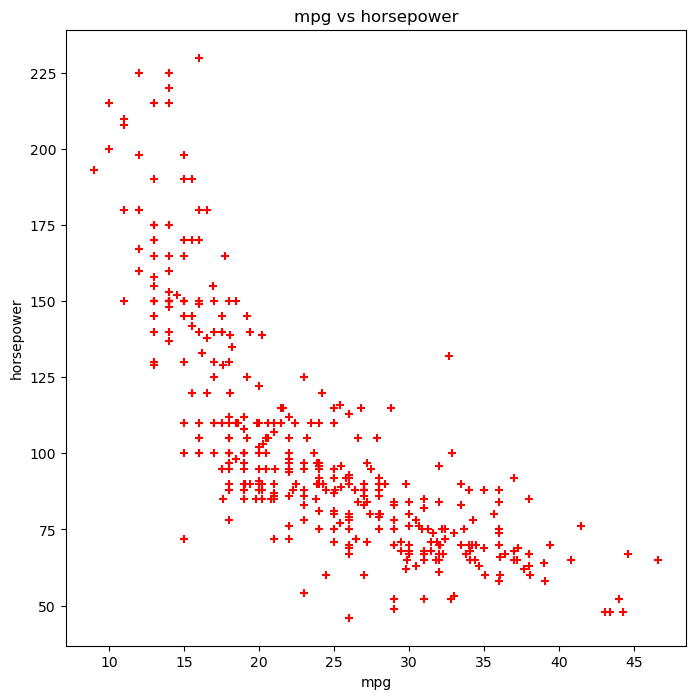

In [7]:
fig,ax=subplots(figsize=(8,8))
ax.scatter(Auto["mpg"],Auto["horsepower"],marker="+",color="red")
ax.set_title("mpg vs horsepower")
ax.set_xlabel("mpg")
ax.set_ylabel("horsepower")
fig.savefig("mpg vs horsepower.png")

array([<Axes: title={'center': 'mpg'}>], dtype=object)

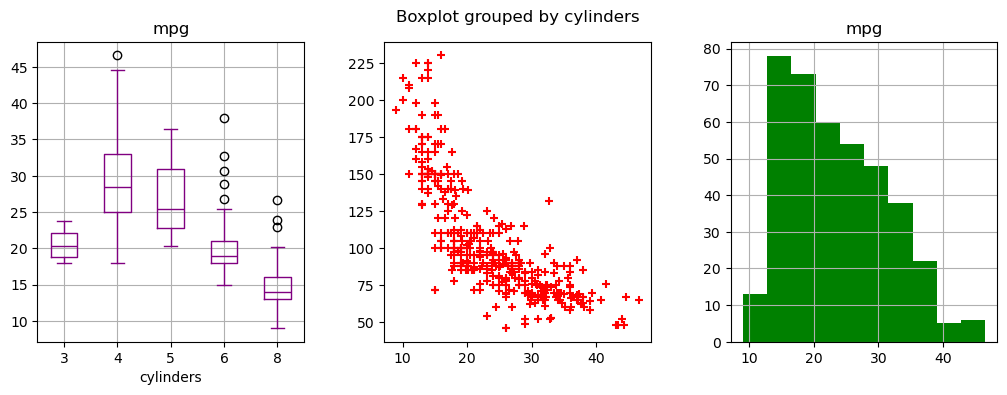

In [20]:
fig,ax=subplots(1,3,figsize=(12,4))
ax[1].scatter(Auto["mpg"],Auto["horsepower"],marker="+",color="red")
Auto.cylinders = pd.Series(Auto.cylinders, dtype='category')
Auto.boxplot(column='mpg', by='cylinders', ax=ax[0],color='purple')
Auto.hist('mpg',ax=ax[2],color="green")

array([[<Axes: xlabel='mpg', ylabel='mpg'>,
        <Axes: xlabel='displacement', ylabel='mpg'>,
        <Axes: xlabel='horsepower', ylabel='mpg'>,
        <Axes: xlabel='weight', ylabel='mpg'>,
        <Axes: xlabel='acceleration', ylabel='mpg'>,
        <Axes: xlabel='year', ylabel='mpg'>,
        <Axes: xlabel='origin', ylabel='mpg'>],
       [<Axes: xlabel='mpg', ylabel='displacement'>,
        <Axes: xlabel='displacement', ylabel='displacement'>,
        <Axes: xlabel='horsepower', ylabel='displacement'>,
        <Axes: xlabel='weight', ylabel='displacement'>,
        <Axes: xlabel='acceleration', ylabel='displacement'>,
        <Axes: xlabel='year', ylabel='displacement'>,
        <Axes: xlabel='origin', ylabel='displacement'>],
       [<Axes: xlabel='mpg', ylabel='horsepower'>,
        <Axes: xlabel='displacement', ylabel='horsepower'>,
        <Axes: xlabel='horsepower', ylabel='horsepower'>,
        <Axes: xlabel='weight', ylabel='horsepower'>,
        <Axes: xlabel='accelerat

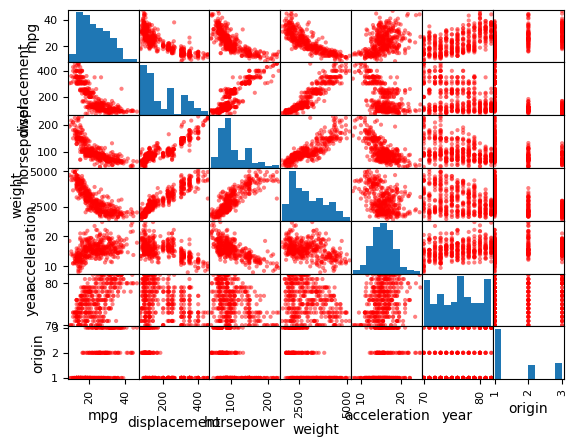

In [22]:
pd.plotting.scatter_matrix(Auto,color="red")

In [23]:
Auto['mpg'].describe()

count    397.000000
mean      23.515869
std        7.825804
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64